In [2]:
import math, pylab
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# create a data frame object from csv file
df = pd.read_csv("/Users/salah/Documents/ecommerce-linear-regression/data/ecomerce.csv")

In [4]:
# first 5 rows of data
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# since no null data, dataset did not need to be cleaned
# summary stats about the data
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


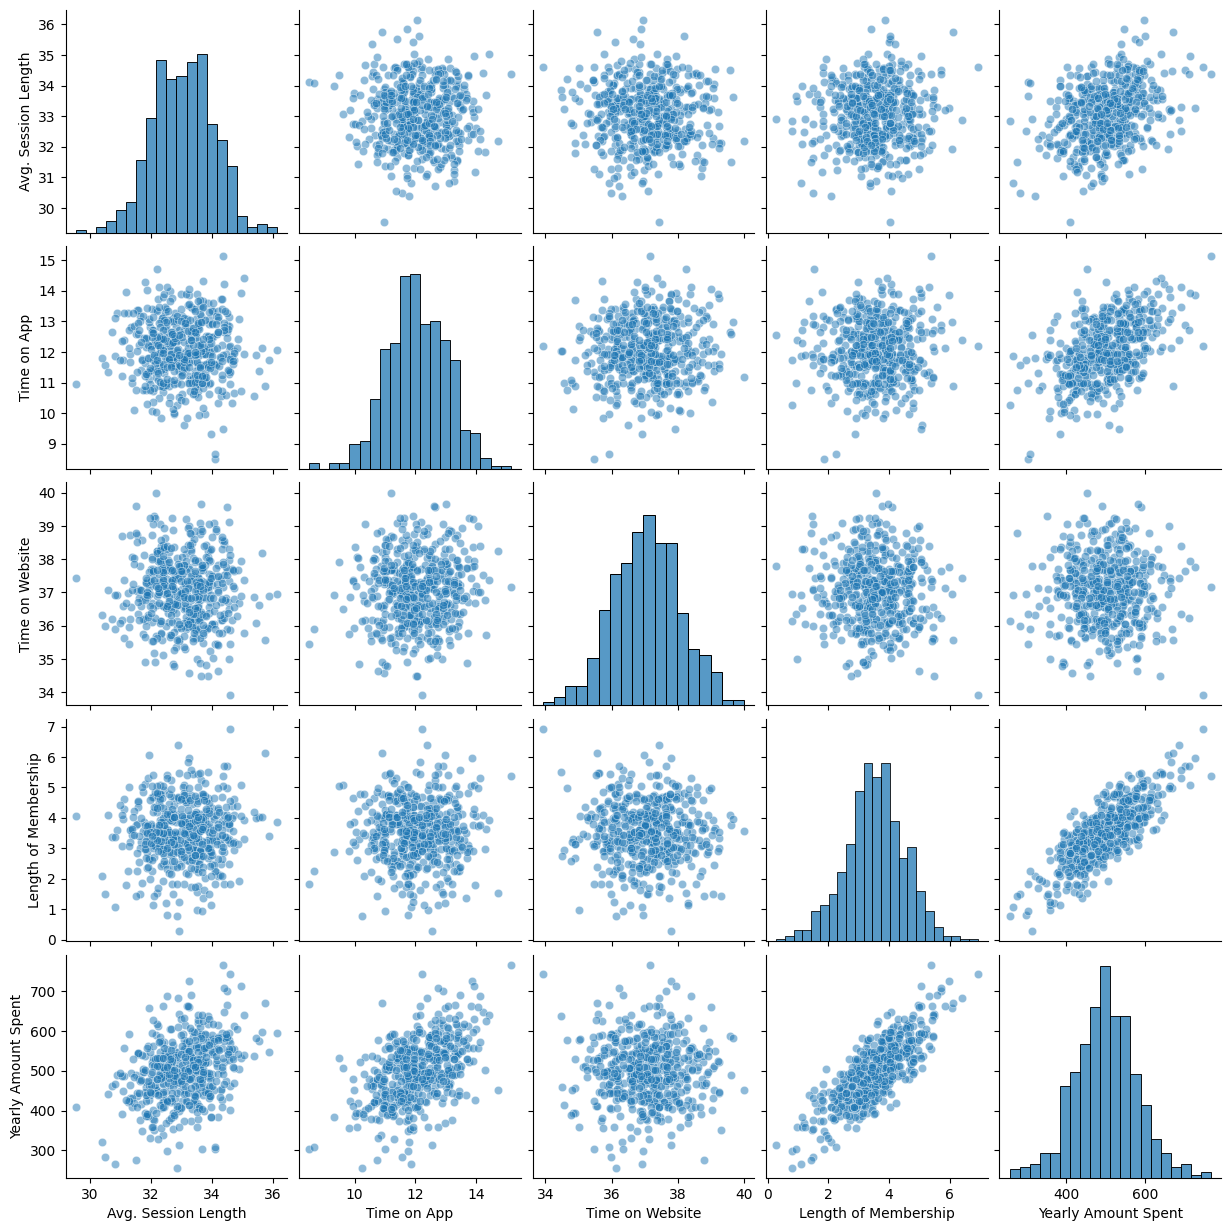

In [6]:
# scatterplot each numerical predictor against each other
sns.pairplot(data=df, kind="scatter", plot_kws={"alpha": 0.5})

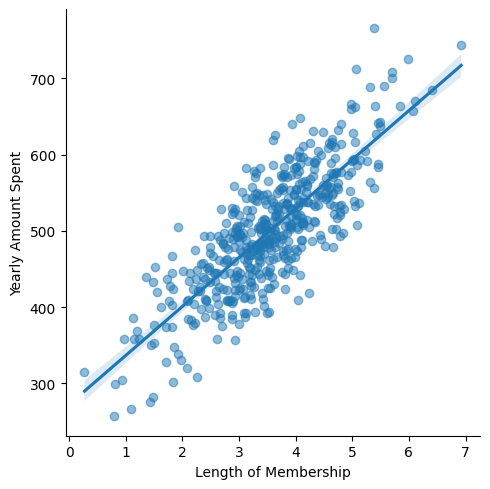

In [7]:
# fit linear regression line
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=df, scatter_kws={"alpha": 0.5})

In [8]:
# create sub-data frames that includes the predictors and the response for the model
X = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = df["Yearly Amount Spent"]

In [9]:
# split data in train and test sets
# random state indicates that particular shuffle of split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# train linear model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
# create dataframe to neatly show coef of predictors
coef_df = pd.DataFrame(index=X.columns, columns=["Coef"], data=lm.coef_)
print("Intercept", lm.intercept_)
print(coef_df)

Intercept -1050.6536746645725
                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [12]:
# plot actual vs predicted
predictions = lm.predict(X_test)

Text(0.5, 0, 'Predictions')

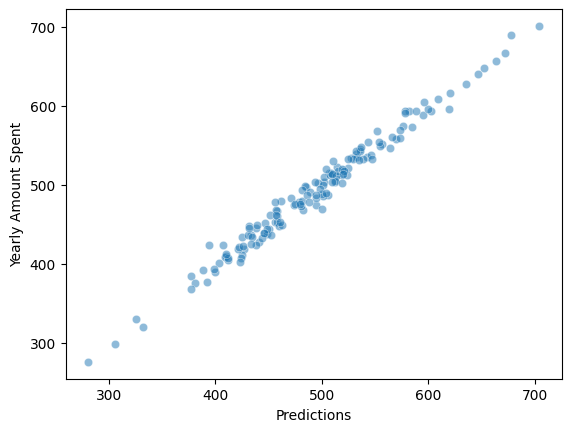

In [13]:
sns.scatterplot(x=predictions, y=y_test, alpha=0.5)
plt.xlabel("Predictions")

In [14]:
# strength of regression
mab = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)

In [15]:
print("MAB", mab)
print("MSE", mse)
print("RMSE", rmse)

MAB 8.4260916414321
MSE 103.91554136503325
RMSE 10.193897260863151


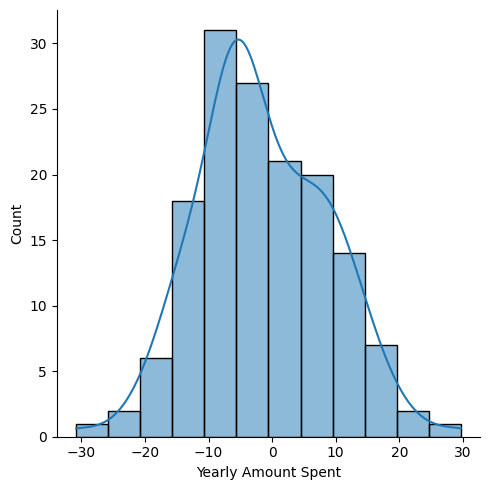

In [16]:
# residual analysis
residuals = y_test - predictions
sns.displot(residuals, kde=True)

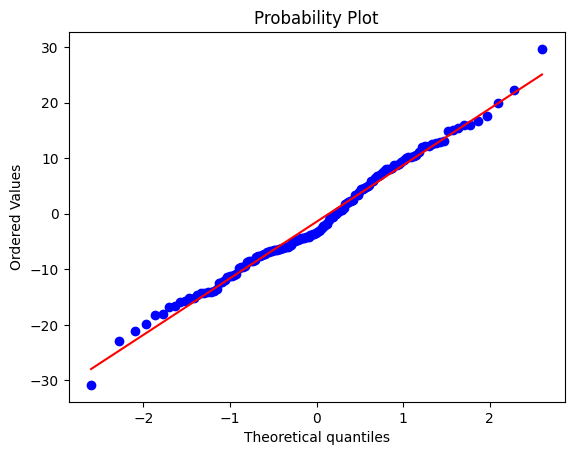

In [17]:
# QQ plot
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()